# Multiple & Advanced Regression
Demonstrating MLR, Collinearity, Dummy variables, Logistic regression using the  [House prices dataset (Kaggle)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) <br> 



### 0. Imports

In [230]:
#data processing
import pandas as pd
import numpy as np
import scipy as sp

#statistics
from scipy import stats
import statsmodels.api as sm


#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Machine learning library
import sklearn

#Patterns Mining
from efficient_apriori import apriori

import warnings
warnings.filterwarnings("ignore")


##### Loading the CSV dataset

In [231]:
dataset_path = "../datasets/houseprices/train.csv"
dtf = pd.read_csv(dataset_path,index_col='Id')

##### Defining numeric and categorical columns

In [232]:
numeric_columns = dtf.dtypes[(dtf.dtypes=="float64") | (dtf.dtypes=="int64")].index.tolist()
very_numerical = [nc for nc in numeric_columns if dtf[nc].nunique()>20]
categorical_columns = [c for c in dtf.columns if c not in numeric_columns]
ordinals = list(set(numeric_columns) - set(very_numerical))

##### Filling Null Values with the column's mean

In [233]:
na_columns = dtf[very_numerical].isna().sum()
na_columns = na_columns[na_columns>0]
for nc in na_columns.index:
    dtf[nc].fillna(dtf[nc].mean(),inplace=True)

##### Dropping and filling NA values for categorical columns:

1. drop if at least 70% are NA:

In [234]:
nul_cols = dtf[categorical_columns].isna().sum()/len(dtf)
drop_us = nul_cols[nul_cols>0.7]

In [235]:
dtf=dtf.drop(drop_us.index,axis=1)
categorical_columns = list(set(categorical_columns)-set(drop_us.index))

2. Fill with a new 'na' category:

In [236]:
dtf[categorical_columns]= dtf[categorical_columns].fillna('na')

### 1. Multiple Lienar Regression

In [297]:
Ycol = 'SalePrice'

#### 1.1 Using SK-Learn Regression

In [298]:
from sklearn.linear_model import LinearRegression

In [310]:
Y= dtf[Ycol]
X = dtf[very_numerical].drop(Ycol,axis=1)

In [311]:
sk_ols_model = LinearRegression()

In [312]:
Y_pred = sk_ols_model.fit(X,Y).predict(X)

Evaluting the model performance using r square

In [313]:
r2_score(Y,Y_pred)

0.7473572434339235

Plotting the residuals:

Text(0.5, 0, 'SalePrice')

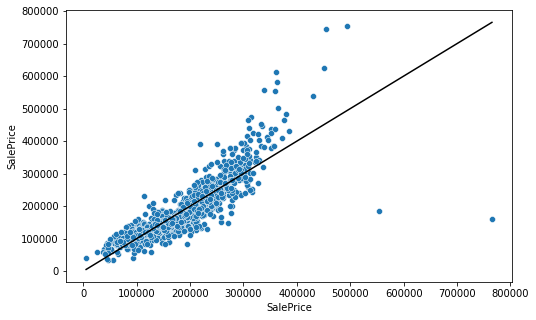

In [314]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(Y_pred,Y,ax=ax)
sns.lineplot(Y_pred,Y_pred,ax=ax,color='black')
ax.set_xlabel("SalePrice")

#### 1.2 Using StatsModels for a deeper understanding of the regression

In [315]:
sm_model = sm.OLS(Y, X)

In [316]:
results = sm_model.fit()

In [317]:
Y_pred2 = results.fittedvalues

Text(0.5, 0, 'SalePrice')

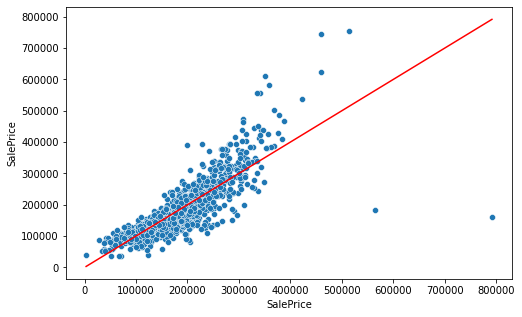

In [318]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(Y_pred2,Y,ax=ax)
sns.lineplot(Y_pred2,Y_pred2,ax=ax,color='red')
#sns.lineplot(Y_pred,Y_pred,ax=ax,color='black')
ax.set_xlabel("SalePrice")

In [248]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1578.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):                        0.00
Time:                        09:11:16   Log-Likelihood:                         -17663.
No. Observations:                1460   AIC:                                  3.536e+04
Df Residuals:                    1442   BIC:                                  3.546e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage     -96.5454     59.862     -1.613      0.107    -213.971      20.880
LotArea           0.1979      0.126      1.576      0.115      -0.048       0.444
YearBuilt       392.4697     70.217      5.589      0.000     254.732     530.208
YearRemodAdd     27.4364     63.396      0.433      0.665     -96.922     151.794
MasVnrArea       42.9661      7.377      5.824      0.000      28.495      57.438
BsmtFinSF1       19.8621      2.806      7.079      0.000      14.358      25.366
BsmtFinSF2       -2.2235      5.547     -0.401      0.689     -13.104       8.657
BsmtUnfSF         9.9816      2.610      3.824      0.000       4.862      15.101
TotalBsmtSF      27.6202      3.945      7.002      0.000      19.882      35.358
1stFlrSF         21.6851      7.405      2.928      0.003       7.158      36.212
2ndFlrSF         27.6089      6.702      4.119      0.000      14.462      40.756
LowQualFinSF    -11.5819     18.566     -0.624      0.533     -48.002      24.838
GrLivArea        37.7120      6.303      5.983      0.000      25.348      50.076
GarageYrBlt    -419.5700     79.645     -5.268      0.000    -575.803    -263.337
GarageArea       85.7568      6.894     12.439      0.000      72.234      99.280
WoodDeckSF       53.2726      9.849      5.409      0.000      33.953      72.592
OpenPorchSF      50.8511     18.688      2.721      0.007      14.192      87.510
EnclosedPorch   -35.3024     20.197     -1.748      0.081     -74.921       4.316
ScreenPorch      46.7655     21.076      2.219      0.027       5.423      88.108
MiscVal          -1.0751      2.313     -0.465      0.642      -5.613       3.463
==============================================================================
Omnibus:                      807.027   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90952.252
Skew:                          -1.606   Prob(JB):                         0.00
Kurtosis:                      41.533   Cond. No.                     9.72e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.41e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 2. Collinearity

#### 2.1 Searching for correlated X columns

In [249]:
X_corr = X.corr()

<AxesSubplot:>

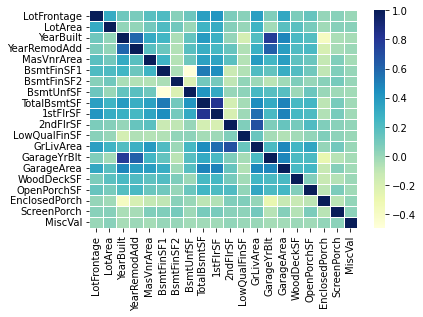

In [250]:
sns.heatmap(X_corr, annot=False, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)

Heatmaps are nice, but we need the actual correlated columns

In [251]:
high_corr = X_corr[X_corr>0.8]

In [252]:
high_corr.stack()

LotFrontage    LotFrontage      1.00000
LotArea        LotArea          1.00000
YearBuilt      YearBuilt        1.00000
YearRemodAdd   YearRemodAdd     1.00000
MasVnrArea     MasVnrArea       1.00000
BsmtFinSF1     BsmtFinSF1       1.00000
BsmtFinSF2     BsmtFinSF2       1.00000
BsmtUnfSF      BsmtUnfSF        1.00000
TotalBsmtSF    TotalBsmtSF      1.00000
               1stFlrSF         0.81953
1stFlrSF       TotalBsmtSF      0.81953
               1stFlrSF         1.00000
2ndFlrSF       2ndFlrSF         1.00000
LowQualFinSF   LowQualFinSF     1.00000
GrLivArea      GrLivArea        1.00000
GarageYrBlt    GarageYrBlt      1.00000
GarageArea     GarageArea       1.00000
WoodDeckSF     WoodDeckSF       1.00000
OpenPorchSF    OpenPorchSF      1.00000
EnclosedPorch  EnclosedPorch    1.00000
ScreenPorch    ScreenPorch      1.00000
MiscVal        MiscVal          1.00000
dtype: float64

In [253]:
hc = high_corr.stack().reset_index()
hc.columns=["col1","col2","corr"]
hc[hc.col1!=hc.col2]

,col1,col2,corr
9,TotalBsmtSF,1stFlrSF,0.81953
10,1stFlrSF,TotalBsmtSF,0.81953


0.8 is not so high, we can recheck the signifiance of the correlated columns' coefficients

#### 2.2 Calculating Variance Inflation Factors

In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [255]:
X.shape

(1460, 20)

In [256]:
vif_dict = {}
for i, name in enumerate(X.columns):
    v = variance_inflation_factor(X.values,i)
    vif_dict[name]=v.round()
vifs = pd.Series(vif_dict)    

In [257]:
vifs.sort_values(ascending=False)

2ndFlrSF             inf
LowQualFinSF         inf
BsmtFinSF1           inf
BsmtFinSF2           inf
BsmtUnfSF            inf
TotalBsmtSF          inf
1stFlrSF             inf
GrLivArea            inf
GarageYrBlt      18982.0
YearBuilt        14647.0
YearRemodAdd     12103.0
LotFrontage         15.0
GarageArea          10.0
LotArea              3.0
MasVnrArea           2.0
WoodDeckSF           2.0
OpenPorchSF          2.0
EnclosedPorch        1.0
ScreenPorch          1.0
MiscVal              1.0
dtype: float64

#### 2.3 Investigating Collinearity:

In [258]:
vif_col = '2ndFlrSF'

In [259]:
z = dtf[vif_col]

In [260]:
Xv = X.drop(vif_col,axis=1)

We train a regression model on `vif_col` and examine the non zero coefficients

In [261]:
modelv = sm.OLS(z, Xv)
results = modelv.fit()

In [262]:
r= results.params.round()
r = r[r.abs()>0]
r

1stFlrSF       -1.0
LowQualFinSF   -1.0
GrLivArea       1.0
dtype: float64

In [263]:
dtf[r.index.tolist()+[vif_col]].head()

,1stFlrSF,LowQualFinSF,GrLivArea,2ndFlrSF
Id,,,,
1,856,0,1710,854
2,1262,0,1262,0
3,920,0,1786,866
4,961,0,1717,756
5,1145,0,2198,1053


### 3. Nonlinear Regression

Recall that some of our features are skewed,
we can use the Box-Cox transformation on the raw features, then apply the regression on the transformed features

In [343]:
Y.skew()

1.8828757597682129

In [354]:
bc = sp.stats.boxcox

In [355]:
bcY, _ = bc(Y)

<AxesSubplot:>

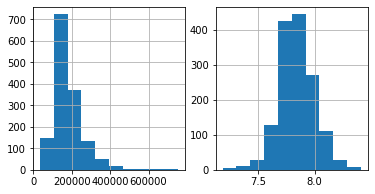

In [356]:
fig, axes = plt.subplots(1,2,figsize=(6,3))
Y.hist(ax=axes[0])
pd.Series(bcY).hist(ax=axes[1])

Let's see if our model is better when Y is transformed:

In [357]:
bcY_pred = sk_ols_model.fit(X,bcY).predict(X)

Evaluting the model performance using r square

In [358]:
r2_score(bcY,bcY_pred)

0.7883095729808727

Plotting the residuals:

Text(0.5, 1.0, 'BoxCox Y')

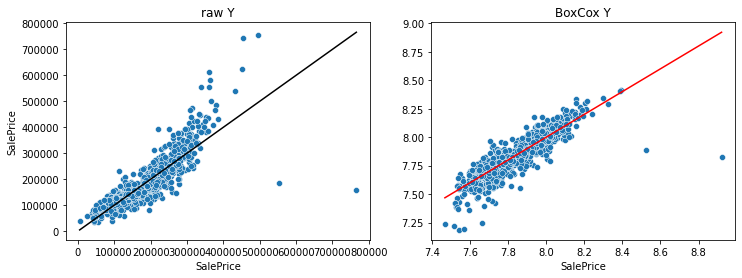

In [359]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(Y_pred,Y,ax=axes[0])
sns.lineplot(Y_pred,Y_pred,ax=axes[0],color='black')
axes[0].set_xlabel("SalePrice")
axes[0].set_title("raw Y")

sns.scatterplot(bcY_pred,bcY,ax=axes[1])
sns.lineplot(bcY_pred,bcY_pred,ax=axes[1],color='red')
axes[1].set_xlabel("SalePrice")
axes[1].set_title("BoxCox Y")

Let's transform all skewed feautres:

In [360]:
X2=pd.DataFrame(index=dtf.index)

In [361]:
for n in very_numerical:
    if dtf[n].skew() > 1:
        #boxcox only works for positive data:
        col = dtf[n].copy()
        if col.min()<=0:
            #this is *not* the best method to deal with the issue
            col=col+col.min()+0.00000001
        bc_n, _ = bc(col)
        X2[n] = bc_n
    else:
        X2[n] = col
        

In [365]:
bcY = X2[Ycol]

In [366]:
X2.drop(Ycol,axis=1,inplace=True)

In [367]:
Y_pred3 = sk_ols_model.fit(X2,bcY).predict(X2)

Evaluting the model performance using r square

In [369]:
r2_score(bcY,Y_pred3)

0.5818556052663854

Plotting the residuals:

Text(0.5, 0, 'SalePrice')

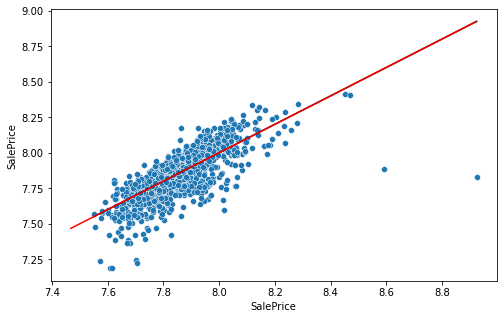

In [370]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(Y_pred3,bcY,ax=ax)
sns.lineplot(Y_pred3,Y_pred3,ax=ax,color='black')
sns.lineplot(bcY_pred,bcY_pred,ax=ax,color='red')
ax.set_xlabel("SalePrice")